In [2]:
# 导入库
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import random



In [3]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [4]:
filepath = 'train_data.csv'

In [5]:
data = pd.read_csv(filepath)
# 特征和标签的定义
features = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
label = 'cnt'
print(data.head())

   instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011/1/1       1   0     1   0        0        6           0   
1        2  2011/1/1       1   0     1   1        0        6           0   
2        3  2011/1/1       1   0     1   2        0        6           0   
3        4  2011/1/1       1   0     1   3        0        6           0   
4        5  2011/1/1       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15216 entries, 0 to 15215
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15216 non-null  int64  
 1   dteday      15216 non-null  object 
 2   season      15216 non-null  int64  
 3   yr          15216 non-null  int64  
 4   mnth        15216 non-null  int64  
 5   hr          15216 non-null  int64  
 6   holiday     15216 non-null  int64  
 7   weekday     15216 non-null  int64  
 8   workingday  15216 non-null  int64  
 9   weathersit  15216 non-null  int64  
 10  temp        15216 non-null  float64
 11  atemp       15216 non-null  float64
 12  hum         15216 non-null  float64
 13  windspeed   15216 non-null  float64
 14  casual      15216 non-null  int64  
 15  registered  15216 non-null  int64  
 16  cnt         15216 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.0+ MB
None


In [71]:
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [94]:
datax = data[:100]
datax['dteday'] = pd.to_datetime(datax['dteday'])
datax['dteday'] = datax['dteday'].dt.day 
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(datax[features + [label]])
# 将标准化后的数据转换回 DataFrame
datax = pd.DataFrame(data_scaled, columns=features + [label])

C:\Users\29660\AppData\Local\Temp\ipykernel_20720\892988479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['dteday'] = pd.to_datetime(datax['dteday'])
C:\Users\29660\AppData\Local\Temp\ipykernel_20720\892988479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['dteday'] = datax['dteday'].dt.day


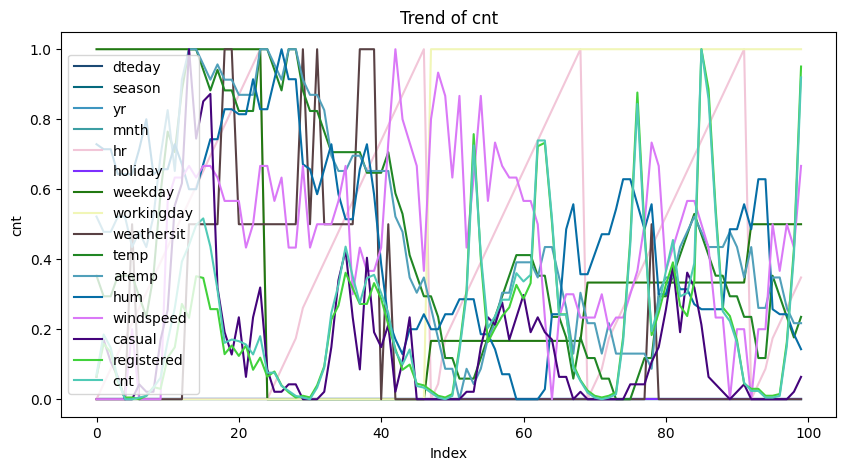

In [95]:
features = ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
plt.figure(figsize=(10, 5))

# 可视化数值型特征的折线图
for i, feature in enumerate(features):
    color = np.random.rand(3,)  # 获取随机颜色
    plt.plot(datax.index, datax[feature], label=feature, color=color)
    
color = np.random.rand(3,)  # 获取随机颜色
plt.plot(datax.index, datax[label], label=label, color=color)
plt.title(f'Trend of {label}')
plt.ylabel("cnt")
plt.xlabel('Index')
plt.legend()
plt.show()

C:\Users\29660\AppData\Local\Temp\ipykernel_20720\3970295026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['dteday'] = pd.to_datetime(datax['dteday'])
C:\Users\29660\AppData\Local\Temp\ipykernel_20720\3970295026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['dteday'] = datax['dteday'].dt.day


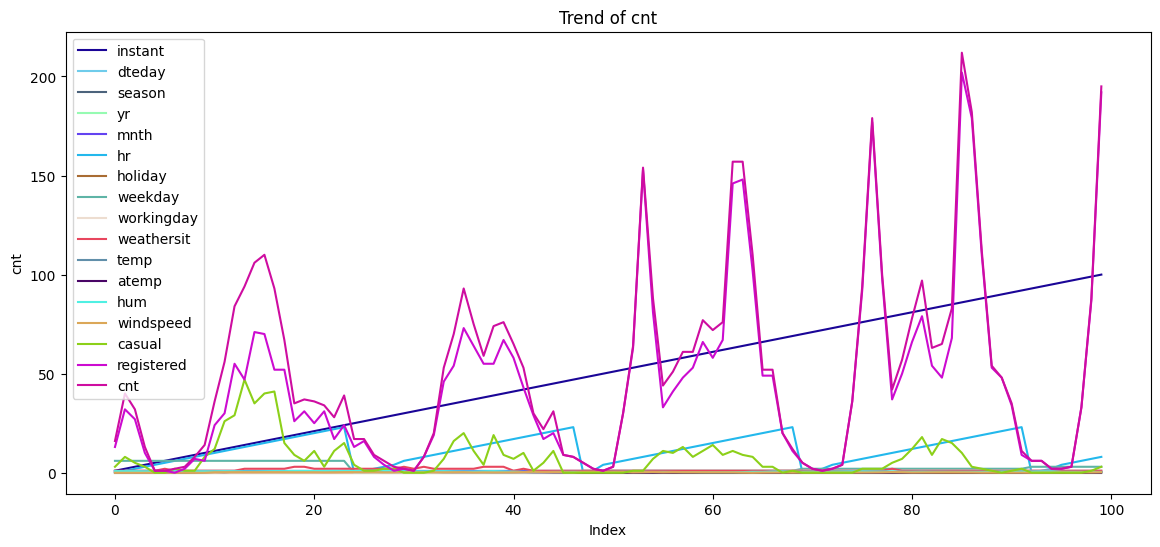

In [99]:
datax = data[:100]
datax['dteday'] = pd.to_datetime(datax['dteday'])
datax['dteday'] = datax['dteday'].dt.day 
features = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
label = 'cnt'
plt.figure(figsize=(14, 6))

# 可视化数值型特征的折线图
for i, feature in enumerate(features):
    color = np.random.rand(3,)  # 获取随机颜色
    plt.plot(datax.index, datax[feature], label=feature, color=color)
    
color = np.random.rand(3,)  # 获取随机颜色
plt.plot(datax.index, datax[label], label=label, color=color)
plt.title(f'Trend of {label}')
plt.ylabel("cnt")
plt.xlabel('Index')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest

In [8]:
data = pd.read_csv(filepath)
features = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
label = 'cnt'
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = data['dteday'].dt.day 
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(data)
data = data[outliers != -1]

In [9]:
data.fillna(data.mean(), inplace=True)

In [10]:
data.to_csv("processed_data_train.csv", index=False)